# Thực Hành 5

In [ ]:
1. Cài đặt thư viện 

2. Viết chương trình gán nhãn ảnh

2.1.	Gán nhãn ảnh

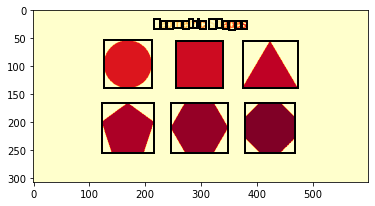

In [4]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu

data = Image.open('geometric.png').convert('L')
a = np.asarray(data)
# performing Otsu's thresholding
thres = threshold_otsu(a)
# pixels with intensity greater than thehold are kept
b = a > thres
# labelling is performed on b
c = label(b)
cl = Image.fromarray(c)

# Chuyển đổi sang chế độ 'L' trước khi lưu
cl = cl.convert('L') # Thêm dòng này để chuyển đổi chế độ ảnh
iio.imwrite('label_output.jpg', cl)

# on the labelled image c, regionprops is performed
properties = ['Area', 'Centroid', 'BoundingBox']
d = regionprops(c)
# the following command creates an empty plot of
# dimension 6 inch by 6 inch
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='YlOrRd')

for i in d:
    lr, lc, ur, uc = i['BoundingBox']
    rec_width = uc - lc
    rec_height = ur - lr
    # Rectangular boxes with origin at (lr,lc) are drawn
    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height, fill=False,
                              edgecolor='black', linewidth=2)
    ax.add_patch(rect)

plt.show()

2.2	Dò tìm cạnh theo chiều dọc

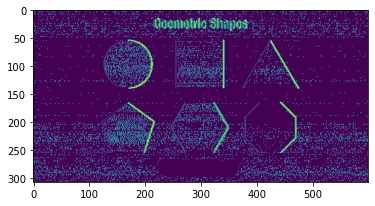

In [5]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
bmg = abs(data - nd.shift(data, (0, 1), order=0))
plt.imshow(bmg)
plt.show()

2.3.	Dò tìm cạnh với Sobel Filter

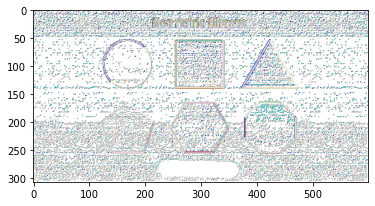

In [6]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png')
a = nd.sobel(data, axis=0)
b = nd.sobel(data, axis=1)
bmg = abs(a) + abs(b)
plt.imshow(bmg)
plt.show()

2.4.	Xác định góc của đối tượng

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


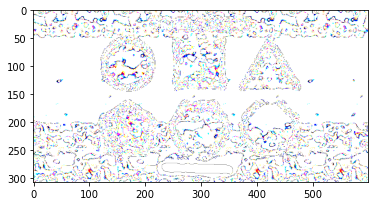

In [7]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)
    y = nd.sobel(indata, 1)
    x1 = x ** 2
    y1 = y ** 2
    xy = abs(x * y)
    x1 = nd.gaussian_filter(x1, 3)
    y1 = nd.gaussian_filter(y1, 3)
    xy = nd.gaussian_filter(xy, 3)

    detC = x1 * y1 - 2 * xy
    trC = x1 + y1
    R = detC - alpha * trC**2
    return R

data = Image.open('geometric.png')
bmg = Harris(data)
plt.imshow(bmg)
plt.show()

2.5.	Dò tìm hình dạng cụ thể trong ảnh với Hough Transform

2.5.1.	Dò tìm đường thẳng trong ảnh

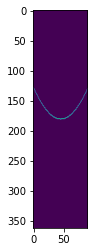

In [9]:
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def LineHough(data, gamma):
    V, H = data.shape
    R = int(np.sqrt((V * V + H * H)))
    ho = np.zeros((R, 90), float)
    w = data + 0
    ok = 1
    theta = np.arange(90)/180.0 * np.pi
    tp = np.arange(90).astype(float)

    while ok:
        mx = w.max()
        if mx < gamma:
            ok = 0
        else:
            y, h = divmod(w.argmax(), H)
            y_coord = V - y # Đổi tên biến để tránh nhầm lẫn với y ban đầu
            x_coord = h
            rh = x_coord * np.cos(theta) + y_coord * np.sin(theta)
            for i in range(len(rh)):
                if 0 <= rh[i] < R and 0 <= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx
            w[y,h] = 0 # Sửa lỗi ở đây, thay v bằng y
    return ho

data = np.zeros((256, 256))
data[128, 128] = 1
bmg = LineHough(data, 0.5)
plt.imshow(bmg)
plt.show()

2.5.2.	Dò tìm đường tròn trong ảnh

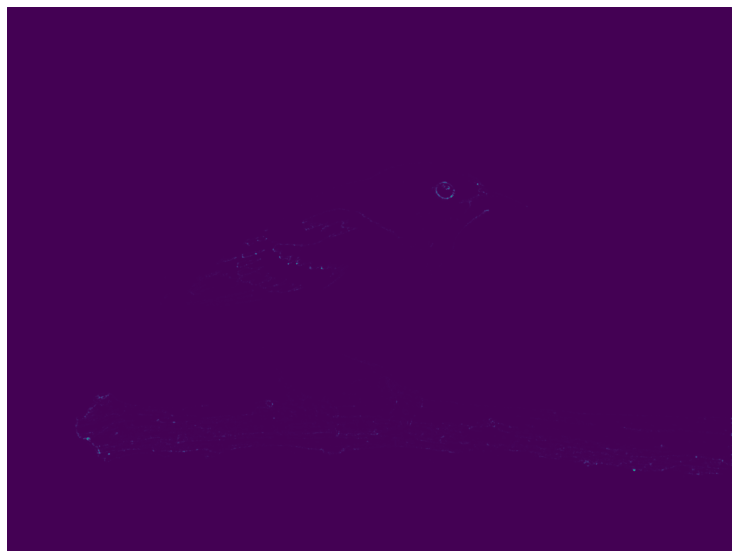

In [10]:
from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.feature import corner_harris
from skimage.color import rgb2gray

data = iio.imread('bird.png')
image_gray = rgb2gray(data)
coordinate = corner_harris(image_gray, k = 0.001)

plt.figure(figsize=(20,10))
plt.imshow(coordinate)
plt.axis('off')
plt.show()

2.6.	Image matching